# Classification Model

## Problem Statement

We're given a dataset containing information about various pincodes across India. We need to implement **K-Means Clustering** on the pincodes of our Home State.

## Load Up the Data

Alright, let's load up the data then.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('clustering_data.csv')

df

/tmp/ipykernel_5941/2185210628.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clustering_data.csv')


,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5689,77.85624
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5281,77.857014
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.561111,77.85715
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2488,78.2588
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.24555,78.2477
...,...,...,...,...,...,...,...,...,...,...,...
157121,Uttar Pradesh Circle,Bareilly Region,Meerut Division,Rly Road Meerut SO,250002,PO,Non Delivery,MEERUT,UTTAR PRADESH,28.98,77.68
157122,Uttar Pradesh Circle,Bareilly Region,Meerut Division,SGMandi SO,250002,PO,Non Delivery,MEERUT,UTTAR PRADESH,28.9724,77.67536
157123,Uttar Pradesh Circle,Bareilly Region,Meerut Division,W K Road SO,250001,PO,Non Delivery,MEERUT,UTTAR PRADESH,28.99,77.71
157124,Kerala Circle,Calicut Region,Calicut Division,Kakkoti SO,673611,PO,Delivery,KOZHIKODE,KERALA,11.24529,75.778455


## Filter Data

Now, since I'm from Uttarakhand, I'd wanna focus on only those points. Let's apply an elementary filter first.

In [2]:
uk_pins = df[df['StateName']=='UTTARAKHAND']

uk_pins

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
106243,Uttarakhand Circle,DivReportingCircle,Nainital Division,Devayal BO,244715,BO,Delivery,ALMORA,UTTARAKHAND,29.644224,79.14834
106244,Uttarakhand Circle,DivReportingCircle,Nainital Division,Burakote BO,244715,BO,Delivery,ALMORA,UTTARAKHAND,29.63,79.58
106245,Uttarakhand Circle,DivReportingCircle,Nainital Division,Riquwasi BO,244715,BO,Delivery,ALMORA,UTTARAKHAND,29.406,79.096
106246,Uttarakhand Circle,DivReportingCircle,Nainital Division,Sankar BO,244715,BO,Delivery,ALMORA,UTTARAKHAND,29.604871,79.135094
106247,Uttarakhand Circle,DivReportingCircle,Nainital Division,Kunda BO,244713,BO,Delivery,UDAM SINGH NAGAR,UTTARAKHAND,29.2369871,78.9146798
...,...,...,...,...,...,...,...,...,...,...,...
156565,Uttarakhand Circle,DivReportingCircle,Almora Division,Vikas Bhawan Almora SO,263601,PO,Non Delivery,ALMORA,UTTARAKHAND,29.6098,79.6669
156566,Uttarakhand Circle,DivReportingCircle,Almora Division,Chaunallia SO,263680,PO,Delivery,ALMORA,UTTARAKHAND,29.37,79.1745
156567,Uttarakhand Circle,DivReportingCircle,Almora Division,Ranikhet Sadar Bazar SO,263645,PO,Non Delivery,ALMORA,UTTARAKHAND,29.644111,79.4281389
156890,Uttarakhand Circle,DivReportingCircle,Nainital Division,Bhotia Parao SO,263139,PO,Non Delivery,NAINITAL,UTTARAKHAND,29.231,79.5315


ALright, let's plot it!

TypeError: 'value' must be an instance of str or bytes, not a float

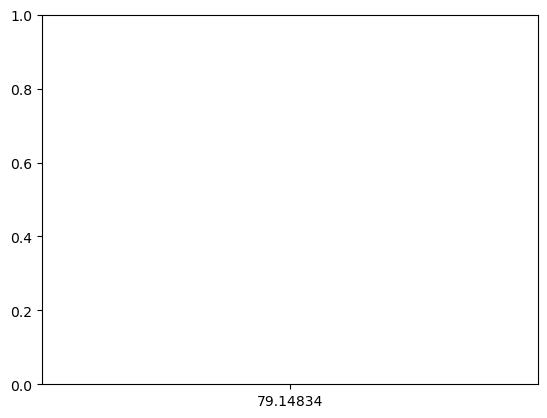

In [3]:
plt.scatter(
    uk_pins['Longitude'].values,
    uk_pins['Latitude'].values,
    marker=".",
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

....that didn't go so well. That's because **the values of the Latitudes and Longitudes are Strings, and not Floats**!

Another thing, several of these coords are marked with N,S,E,W, so we need to handle that too..

## Pre-Process the Data

Alright, let's convert these Strings to Floats, assign them signs based on their directions. Any Strings that are unable to be converted shall be neglected, so we'll drop those rows entirely,

In [4]:
def preprocess_coords(coord):
    if isinstance(coord,str):
        coord = coord.strip()
        if coord.endswith('E') or coord.endswith('N'):
            return coord[:-1].strip()
        elif coord.endswith('W') or coord.endswith('S'):
            coord = '-'+coord[:-1].strip()
        coord = coord.rstrip('-')
    
    return coord

def is_valid_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

def preprocess_dataset(df):
    df = df.dropna(axis=0,how='any')
    df['Longitude'] = df['Longitude'].apply(preprocess_coords)
    df = df[df['Longitude'].apply(is_valid_float)]
    df['Latitude'] = df['Latitude'].apply(preprocess_coords)
    df = df[df['Latitude'].apply(is_valid_float)]
    df['Longitude'] = df['Longitude'].apply(float)
    df['Latitude'] = df['Latitude'].apply(float)

    return df

Let's now pre-process our dataset and plot it!

Text(0, 0.5, 'Latitude')

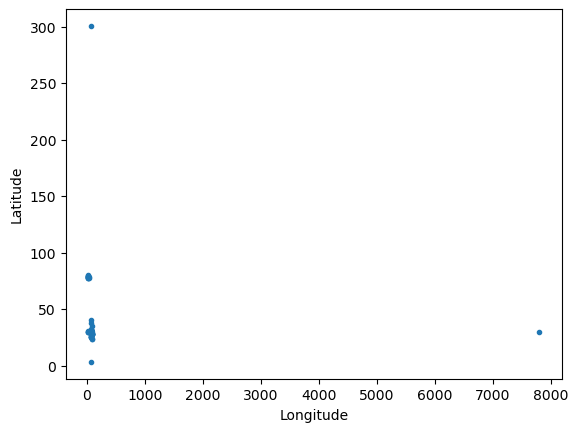

In [5]:
uk_pins = preprocess_dataset(uk_pins)

plt.scatter(
    uk_pins['Longitude'].values,
    uk_pins['Latitude'].values,
    marker=".",
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

That's funny.. *why do my points have a longitude value of nearly 8000 or a latitude value of around 300?*

Ah well.. since those points are obviously irrelevant, we shall filter them further.

In [6]:
def preprocess_dataset(df):
    df = df.dropna(axis=0,how='any')
    df['Longitude'] = df['Longitude'].apply(preprocess_coords)
    df = df[df['Longitude'].apply(is_valid_float)]
    df['Latitude'] = df['Latitude'].apply(preprocess_coords)
    df = df[df['Latitude'].apply(is_valid_float)]
    df['Longitude'] = df['Longitude'].apply(float)
    df['Latitude'] = df['Latitude'].apply(float)
    df = df[(df['Latitude'] <= 90) & (df['Longitude'] <= 180)]

    return df

Let's try it now!

Text(0, 0.5, 'Latitude')

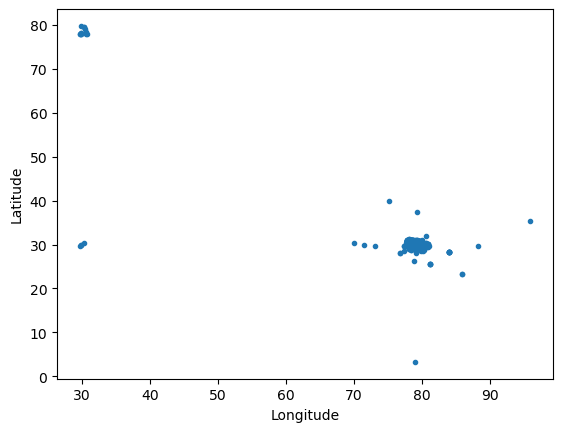

In [7]:
uk_pins = preprocess_dataset(uk_pins)

plt.scatter(
    uk_pins['Longitude'].values,
    uk_pins['Latitude'].values,
    marker=".",
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Funny.. Those are quite the concentrations we have..

![Map of Uttarakhand](uk_map.png)

Looking at this map, it appears some points are out of bounds...
Let's filter them further!

In [8]:
def preprocess_dataset_uk(df):
    df = preprocess_dataset(df)
    df = df[(df['Latitude'] > 28.5) & (df['Latitude'] < 31.5) & (df['Longitude'] < 81.5) & (df['Longitude'] > 77.5)]
    return df

Let's try it now, shall we?

Text(0, 0.5, 'Latitude')

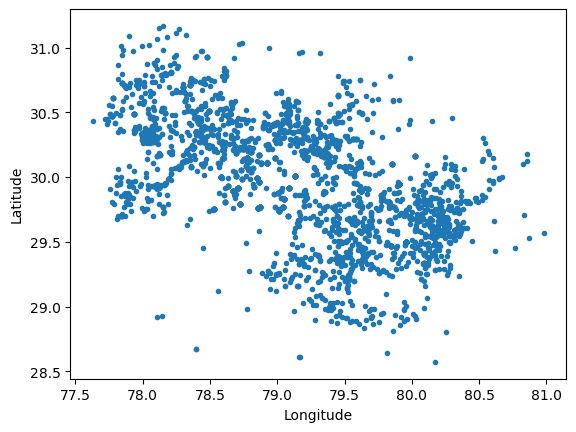

In [9]:
uk_pins = preprocess_dataset_uk(uk_pins)

plt.scatter(
    uk_pins['Longitude'].values,
    uk_pins['Latitude'].values,
    marker=".",
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Hmm.. That looks more like it!

Let's now use a library called `GeoPandas` to plot the map of Uttarakhand and we'll plot our points on top of it.

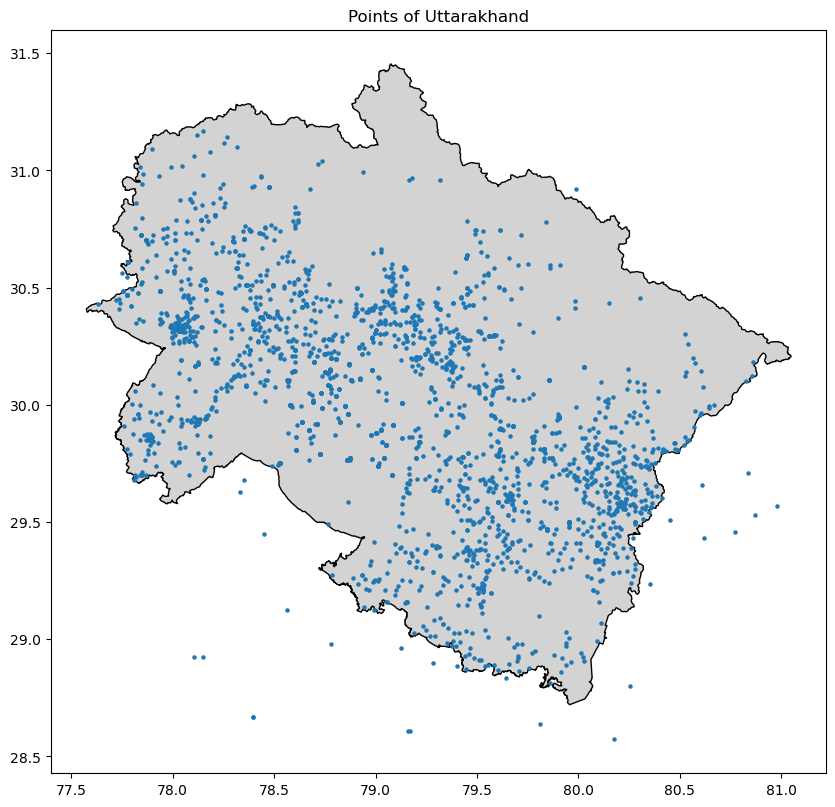

In [11]:
import geopandas as gpd

states = gpd.read_file('States/Admin2.shp')
uk = states[states['ST_NM']=='Uttarakhand']

fig,ax = plt.subplots(figsize=(10,10))
uk.plot(ax=ax, color='lightgray', edgecolor='black')
plt.scatter(uk_pins['Longitude'].values, uk_pins['Latitude'].values,s=5)
plt.title('Points of Uttarakhand')
plt.show()

## Some Observations

Let's load up a couple of maps and find some key points common with our plot.

![Physical Map of Uttarakhand](pmap_uk.jpg)

![District Map of Uttarakhand](uttarakhanddistrict-map.jpg)

Looking at the Physical Map and our plot, we can see that a **good amount of the population is in the 1200m-2400m range. The next most populated region is the 0m-1200m range, while the least populated region is to the northeast, the 2400m-3600m range.**

Next up, looking at the Political Map we can locate some concentrated clusters of points in the following regions:
- Dehradun
- Rudrapur
- Pithoragarh
- Pauri, Gopeshwar and Rudraprayag region
- Almora, Bageshwar and Nainital region
- Southwest of Haridwar (Roorkee)
- Tehri

These are major towns and cities in the state.

There are also some points outside of the region of Uttarkhand, but let's just leave them.. Although they'll make a HUGE difference later on..

## Implementing the K-Means Algorithm

And now, it's time to implement our **K-Means Classifier** to divide the points into clusters!

In [12]:
class Centroid:
    def __init__(self,label,pos):
        self.label = label
        self.points = []
        self.pos = np.array(pos)
        self.prev_pos = None

    def shift(self):
        n = len(self.points)
        x = 0
        y = 0
        for point in self.points:
            x += point[0]
            y += point[1]
        
        self.prev_pos = self.pos
        self.pos = np.array([x/n,y/n]) if n>0 else self.pos

class KMeansClustering:
    def __init__(self, k=3):
        self.centroids = {}
        self.eps = 0.00001
        self.k = k
    
    def fit(self,datapoints):
        
        def calc_dist(a,b):
            return np.sqrt(np.sum((a-b)**2))

        def has_converged():
            for centroid in self.centroids.values():
                dist = calc_dist(centroid.pos,centroid.prev_pos)
                if dist > self.eps:
                    return False
                
            return True

        def fit_once(points):
            for centroid in self.centroids.values():
                centroid.points = []
            labels = []
            
            for point in points:
                
                curr_label = -1
                min_dist = -1
                for i,centroid in self.centroids.items():
                    if curr_label == -1 or calc_dist(point,centroid.pos) < min_dist:
                        curr_label = i
                        min_dist = calc_dist(point,centroid.pos)
                
                self.centroids[i].points.append(point)
                
                labels.append(curr_label)

            for centroid in self.centroids.values():
                centroid.shift()

            return labels

        min_long = datapoints[:,0].min()
        max_long = datapoints[:,0].max()

        min_lat = datapoints[:,1].min()
        max_lat = datapoints[:,1].max()

        for i in range(self.k):
            self.centroids[i] = Centroid(i,[np.random.uniform(min_long,max_long), np.random.uniform(min_lat,max_lat)])

        labels = fit_once(datapoints)

        while not has_converged():
            labels = fit_once(datapoints)

        labels = np.array(labels).reshape(-1,1)
        datapoints = np.concatenate([datapoints, labels],axis=1)
        
        return datapoints

## Making the Clusters

Alright, let's run this model then! Note that the centroids are random, and so the cluster formations are different most times. Let's first see what we can get by 3 clusters..

/tmp/ipykernel_5941/840265593.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster[:,0], cluster[:,1], s=5, label=f'Cluster {int(label)}',cmap=10)


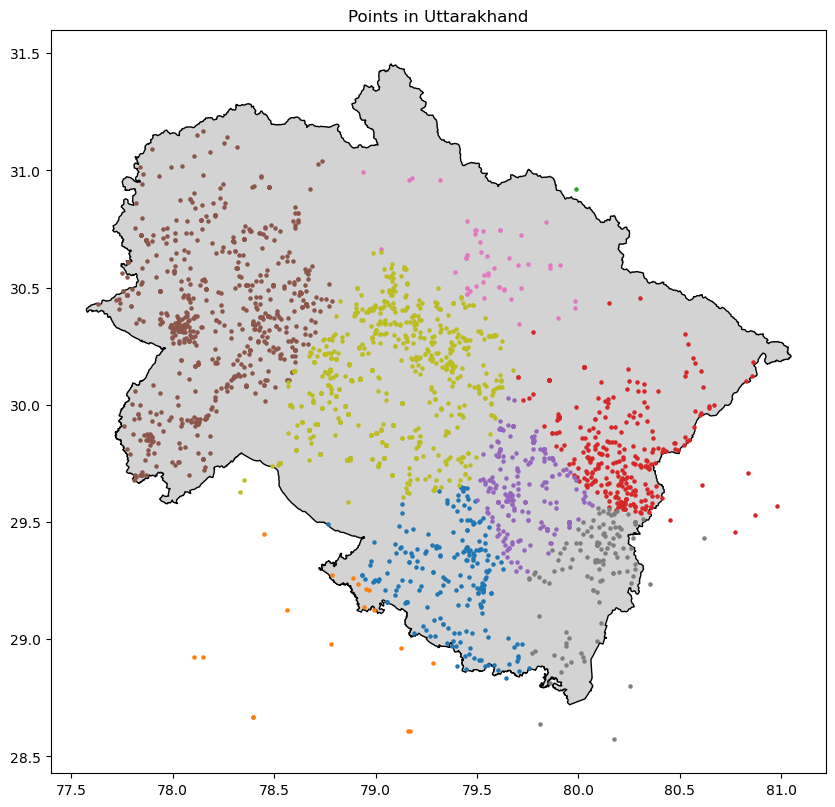

In [15]:
dp = uk_pins[['Longitude', 'Latitude']].astype(float).values

kmc = KMeansClustering(9)

labels = kmc.fit(dp)

fig,ax = plt.subplots(figsize=(10,10))
uk.plot(ax=ax, color='lightgray', edgecolor='black')
for label in np.unique(labels[:,2]):
    cluster = labels[labels[:,2] == label]
    plt.scatter(cluster[:,0], cluster[:,1], s=5, label=f'Cluster {int(label)}',cmap=10)
plt.title('Points in Uttarakhand')
plt.show()



Well, this particular clustering seems to give us a distribution somewhat similar to what we inferred earlier from the political map!

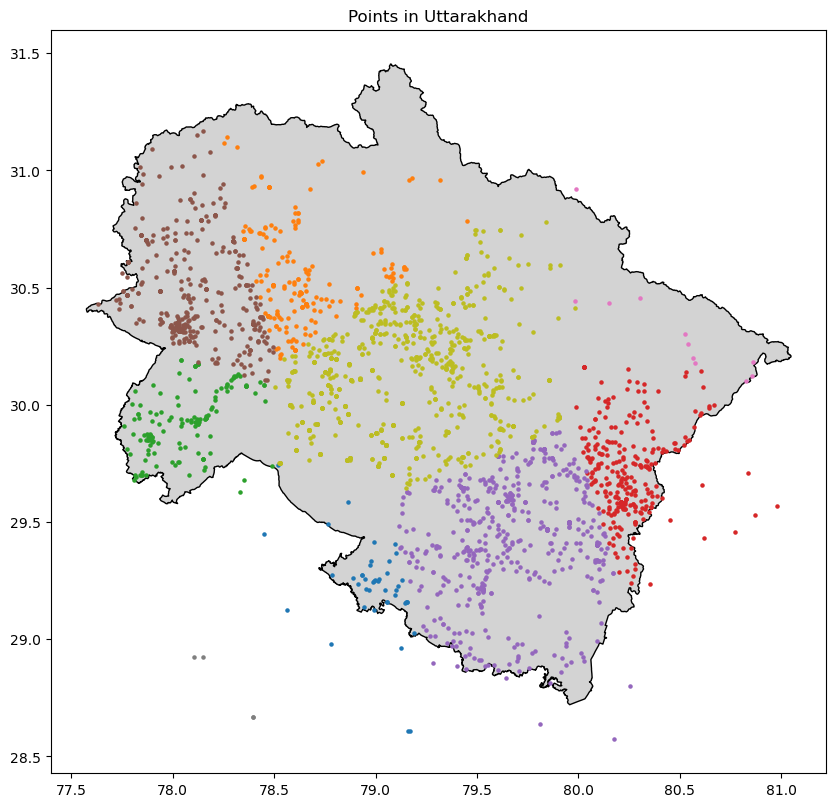

Also note that I used 9 clusters although I shoudl've probably used 7, this is due to the extra noise points (maybe I was trying to cluster them together idk).

So that's my work for this task!